# MNIST example #

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        return self.layers(x)

model = NeuralNet()


In [4]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [5]:
import numpy as np

# Training loop
epochs = 5
training_losses = []
accuracies = []

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_training_loss = running_loss / len(trainloader)
    training_losses.append(avg_training_loss)

    # Accuracy calculation
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    accuracies.append(accuracy)

    print(f"Epoch {epoch+1}: Training Loss: {avg_training_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 1: Training Loss: 0.3232, Accuracy: 93.71%
Epoch 2: Training Loss: 0.1640, Accuracy: 95.89%
Epoch 3: Training Loss: 0.1338, Accuracy: 96.39%
Epoch 4: Training Loss: 0.1195, Accuracy: 96.30%
Epoch 5: Training Loss: 0.1038, Accuracy: 96.33%


In [6]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
# Evaluate the trained model using the test data without gradient updates.

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')
# Print out the accuracy of the model on the test set.

Accuracy of the network on the 10000 test images: 96.33%


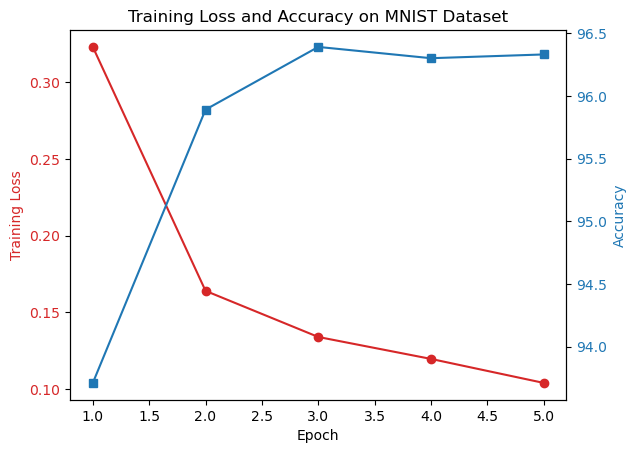

In [7]:
# Creating figure
fig, ax1 = plt.subplots()

# Plotting training loss
color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss', color=color)
ax1.plot(np.arange(1, 6), training_losses, 'o-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for accuracy
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(np.arange(1, 6), accuracies, 's-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Final adjustments
plt.title('Training Loss and Accuracy on MNIST Dataset')
plt.show()

In [8]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(img.numpy().squeeze(), cmap='gray')

In [9]:
def visualize_predictions(dataloader, model, num_images=5):
    dataiter = iter(dataloader)
    images, labels = next(dataiter)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    plt.figure(figsize=(12, 8))
    for idx in range(num_images):
        ax = plt.subplot(2, num_images//2, idx+1)
        imshow(images[idx])
        ax.set_title(f'Pred: {predicted[idx].item()}\nTrue: {labels[idx].item()}', color=('green' if predicted[idx]==labels[idx] else 'red'))
        ax.axis('off')
    plt.show()

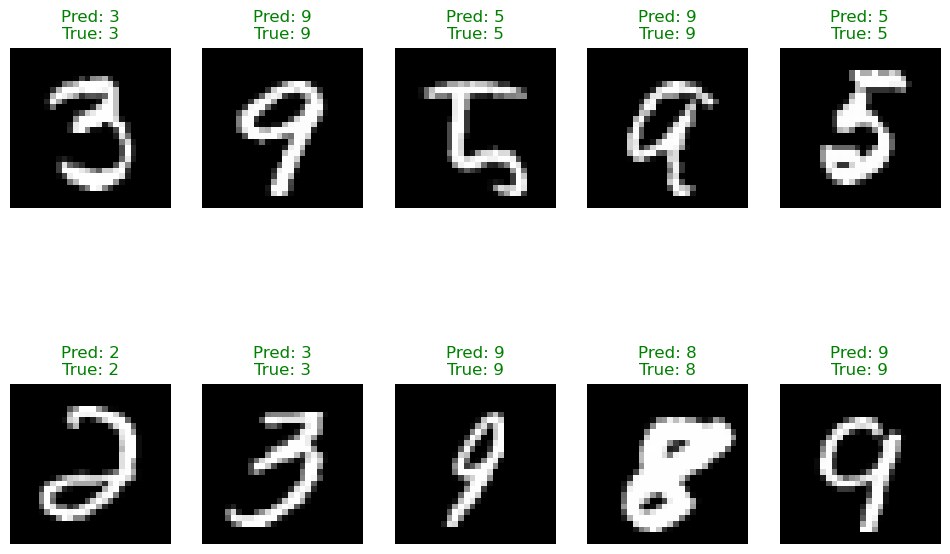

In [10]:
# Call the function
visualize_predictions(testloader, model, num_images=10)

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns  # For visualizing the confusion matrix

In [12]:
# Initial setup
all_predictions = []
all_labels = []

# Model evaluation
model.eval()
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


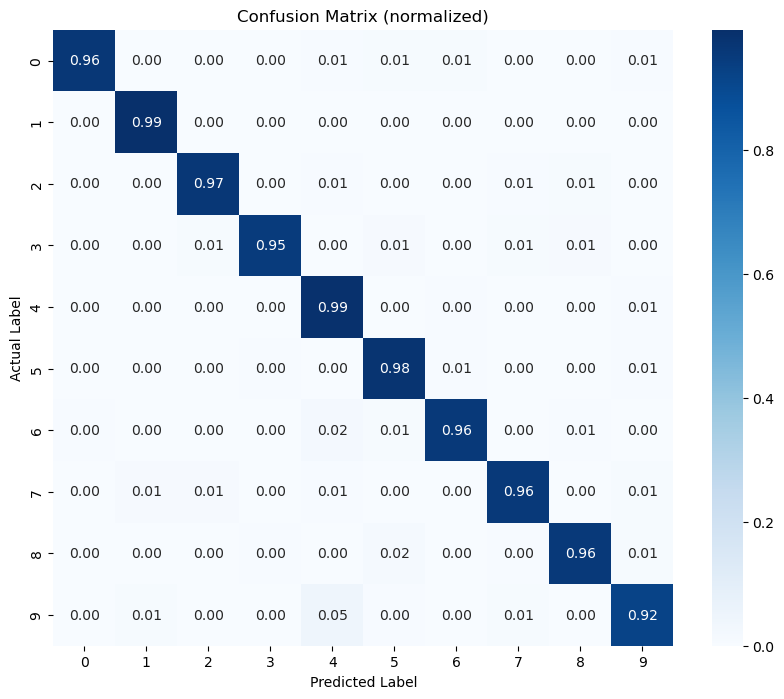

In [13]:
# Compute confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
# Normalize the confusion matrix by row (i.e., by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=[0,1,2,3,4,5,6,7,8,9], yticklabels=[0,1,2,3,4,5,6,7,8,9])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix (normalized)')
plt.show()
